In [211]:
# upload required liberaries

%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns
import re
import urllib.request
%matplotlib inline

### In this project we analyse the Veefriends NFT dataset, But first what is NFT and what is Veefriends!!!!?. Before we dive in the analyses, I'll give some introduction for NFTs and the history of the Veefriends project in the next few lines

## NFT (Non-Fungible Token):
1. A non-fungible (meaning unique, non-replaceable) token (NFT) is a unique digital code that represents some kind of digital item. It could be digital art or music, for example. 
2. An NFT is secured and stored on a public blockchain. 
3. One token is not interchangeable for another, and a token cannot be further divided.
4. There are many different types of non-fungible tokens, and they can be created on well-known blockchains like Bitcoin and Ethereum.

### If you are interested in getting started with NFT, then you will need two things:
1. A MetaMask wallet, which you can download at https://metamask.io
2. Ether, the “currency” you’ll need to make transactions. You can obtain Ether from popular crypto-exchanges such as Coinbase, accessed at https://www.coinbase.com

### The best market places to start exploring NFTs are:
1. OpenSea (https://opensea.io/), the first and largest peer-to-peer platform for crypto-collectibles
2. Axie Marketplace (https://marketplace.axieinfinity.com/), where Axie Infinity game assets can be bought and sold
3. Rarible (https://rarible.com/), a marketplace that allows you to quickly create and list your own NFTs
4. CryptoPunks Marketplace (www.larvalabs.com/cryptopunks/forsale), where unique 24-x-24 pixelated punks are listed for sale
5. NBA Top Shot (https://nbatopshot.com/), a marketplace for officially licensed NBA moments





## Veefriends History
1. VeeFriends is a collection is 10,255 assets featuring 268 characters that were drawn and launched in May of 2021 by forward-thinking serial entrepreneur Gary Vaynerchuk https://www.garyvaynerchuk.com/. 
2. The characters represent human traits that Gary most admires and believes will lead to happiness and success.
3. Gary called them friends because he believes that business with friends can be fun and you can support one another through friendship, kindness and empathy.
4. Gary imagined, created and drew all 268 of the VeeFriends characters himself


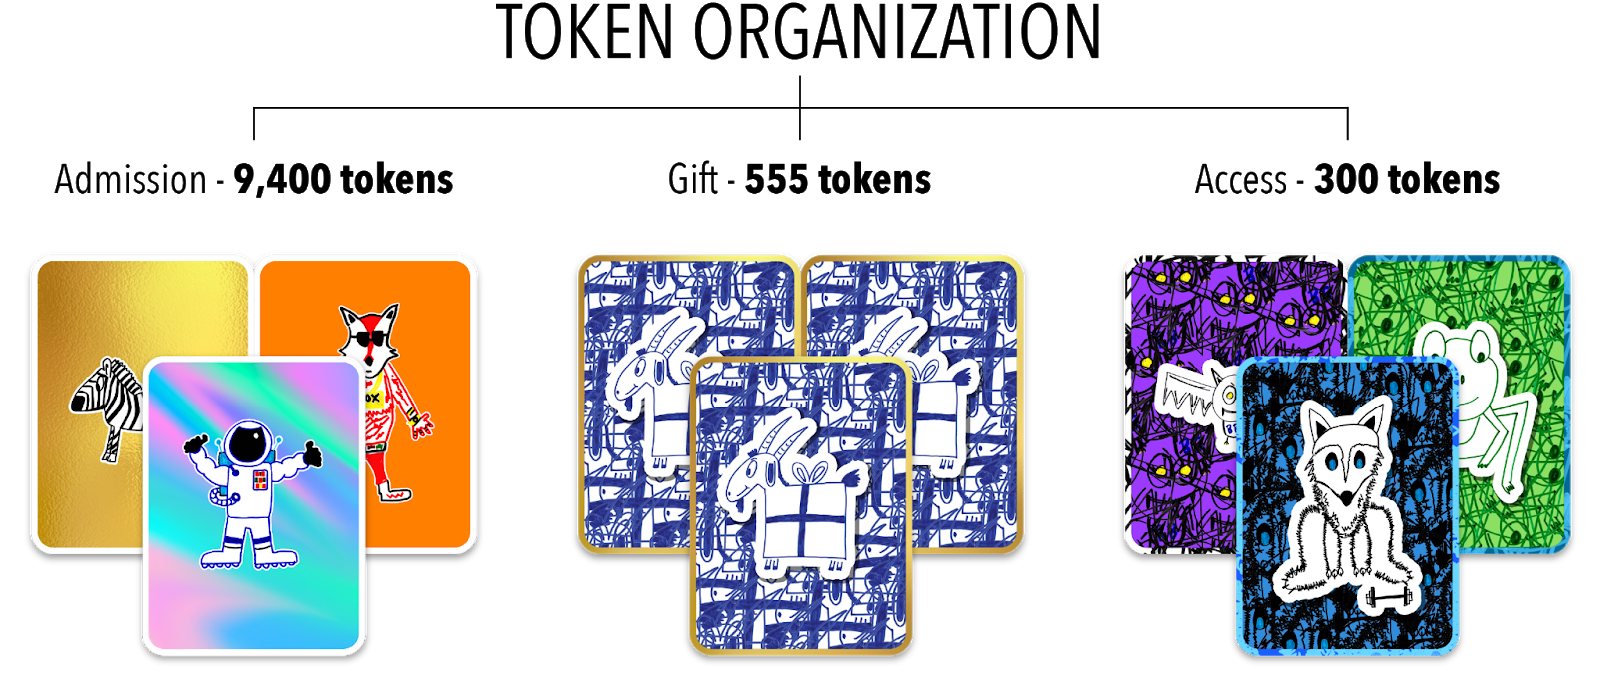
### The character tokens are broken down into 4 categories: 

1. Admission (9,400 tokens) - Unlock unique experiences with Gary, such as going garage-saling with him, playing tennis, or having dinner.
2. Gift (555 tokens) — Those who hold these tokens will receive curated gifts from Gary V.  
3. Access (300 tokens) — Group or 1:1 access tokens get the holder access to Gary V in various settings (group access, one-on-one access, competition access, scholarship access). 
4. Gary Originally Owned (GOO) — These tokens are part of Gary’s personal collection and are branded as such. 




## The characters have 40 tokens each: 

1. (20) Core 
2. (20) Limited 

### The (20) limited Tokens are distibuted as follow:

1. (8) Rare 
2. (5) Very Rare 
3. (2) Epic 
4. (5) Spectaculars (these are one-of-one tokens w/ different backgrounds) 

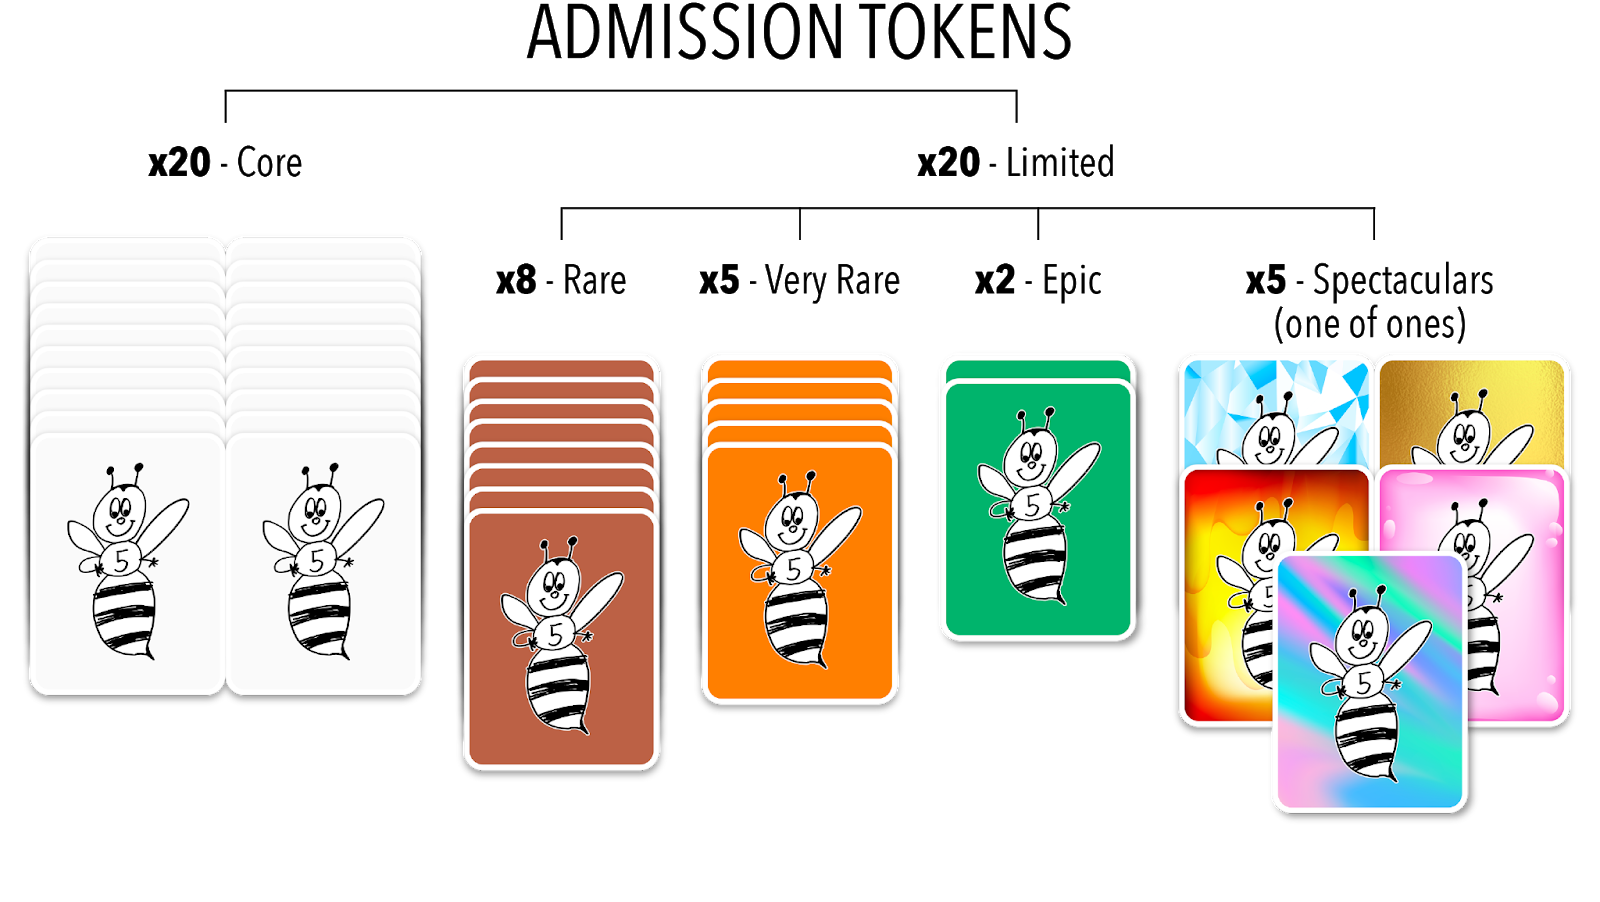


### Now that we have taken a good introduction lets dive in this interesting dataset analysis

In [2]:
# read the data
nft = pd.read_csv('veefriends.csv')

,Unnamed: 0,date,asset_id,from_address,to_address,transaction_hash,type,sale_price_eth,sale_price_usd,name,rarity_attribute,Editions_attribute,overall_rarity_score,category_attribute,benefit_attribute,group_attribute,adjective_attribute,animal_attribute,url
0,0,2021-05-12,6023,0x241cb9ab81cb44088a1705272729fe87d79b124d,0x4bbbd042b98ca55c07c588f6a8258dd89ac46f8c,0x0ef82a6de8812de323d4af8c252fe30d11ad57ec2af1...,transfers,NaN,NaN,Logical Lion,Spectacular,1 of 1,5304.537243,Mammal,NaN,Admission,Logical,Lion,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
1,1,2021-05-12,2766,0x8ad272ac86c6c88683d9a60eb8ed57e6c304bb0c,0x2eb9b439ffb7dc587198e1534e465a6242192b24,0x5beb3e00fb2e87ae7bbce2c16fd8ce8e29aa0c30bcf9...,transfers,NaN,NaN,Eager Eagle,Spectacular,1 of 1,21899.067819,Bird,NaN,Admission,Eager,Eagle,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
2,2,2021-05-12,6569,0x436af8dfc3b0296f79eecc67a8af9342e83289fc,0xfb4604f1bf9e1f9a1a9a83537fd8f7efd55868d7,0x101a2fb496c56f6a4f634b79a87bde534b87d6cba04a...,transfers,NaN,NaN,Motivated Monster,Very Rare,1 of 5,21972.857610,Creature,NaN,Admission,Motivated,Monster,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
3,3,2021-05-12,5859,0xc79499ed6647f189810854623cf0c478bfeb0583,0x81a0578c16ec390924ce0bd9c38756a619f8e472,0x4e516d888ed5272917ffd5c64ad81a0c0c444b630e4b...,transfers,NaN,NaN,Legit Llama,Spectacular,1 of 1,26232.523102,Mammal,NaN,Admission,Legit,Llama,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
4,4,2021-05-12,6912,0x8cb9a563c688677e7303c56e1239de1a03ceba8c,0xe809f6ce53880d82ba44dfd92c4e79902db37524,0x3e330d510693367bb04c2387e0d9224e7ec4d67fb591...,transfers,NaN,NaN,Passionate Parrot,Very Rare,1 of 5,26201.639943,Bird,NaN,Admission,Passionate,Parrot,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...


#### we notice that all trasfeers transactions don't include any prices so we gona focus our analysis on the sales transactions

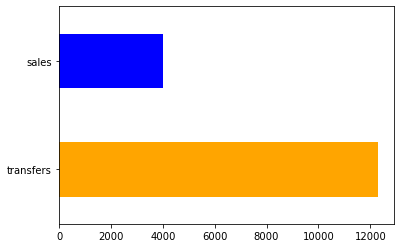

In [6]:
# check value counts for sales vs transfeers
nft.type.value_counts().plot(kind = 'barh', color=['orange','blue']);

In [266]:
nft_sales = nft[nft.type == 'sales'] 
nft_sales

,Unnamed: 0,date,asset_id,from_address,to_address,transaction_hash,type,sale_price_eth,sale_price_usd,name,rarity_attribute,Editions_attribute,overall_rarity_score,category_attribute,benefit_attribute,group_attribute,adjective_attribute,animal_attribute,url
12,12,2021-05-13,7130,0x381897fb384e69d32e27f784041f4e394073477e,0x8c3b660a9766350ddb93afe8c19b36abc522836e,0x3560ec206507b7305728259a777ed666a34923f4c18e...,sales,5.000000e-01,1.953055e+03,Perfect Persian Cat,NaN,1 of 20,8275.457325,Mammal,NaN,Admission,Perfect,Persian Cat,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
20,20,2021-05-13,2673,0xf616a69aee4f0174fff7a1055aff334de481b93f,0x1037bec2614c830a4fcc09f0bffedb22c0deff2f,0xf3fdf37dc84dc49ca1e891725f50dbf2adae5c0ad4d6...,sales,1.200000e+00,4.687332e+03,Driven Dragon,NaN,1 of 20,26220.043411,Creature,NaN,Admission,Driven,Dragon,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
23,23,2021-05-13,6673,0xe2aeddecfbf164e362e9007ffbf28f45e87953ce,0x042aec8963402bb6fea9814e7b44b646f1366039,0x5809be687e63af2b0e9a4cfe9a16dfc37b91130e5a00...,sales,2.492000e-11,9.734026e-08,Noble Numbat,Spectacular,1 of 1,31360.023102,Mammal,NaN,Admission,Noble,Numbat,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
46,46,2021-05-15,403,0xc88b963239b6918f74c3298bb1dc079b92671e42,0x0e52b9228f901b393c182a5c30f2a10db2ae247b,0xc8b5b2f4f218d26f8e2a1b2fcf517cb80e1b81b5a89c...,sales,2.500000e+00,1.022183e+04,Adventurous Astronaut,NaN,1 of 20,26201.673516,Human,NaN,Admission,Adventurous,Astronaut,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
47,47,2021-05-15,2498,0xdb4df088e85e5d66d2d2ab451d5ead618c124305,0xb73c41b0f6e3a61cc80521289c729b726464fd79,0x84ef5e9833d74291f9124dc01a1066f1f46ba88f0841...,sales,9.600000e-01,3.925181e+03,Detail-Oriented Dumbo Octopus,NaN,1 of 20,26194.679282,Invertebrate,NaN,Admission,Detail-Oriented,Dumbo Octopus,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,16276,2022-03-22,4140,0x07ddab16d1b45364d4d9bcdfd3b852dd66abfe24,0x9402ffb49f6bdfbf5a957feb45d936b04a008cde,0xd0201abe81ce1652d24ff8feb1a9d7968feda33bbd1f...,sales,1.659999e+01,4.808331e+04,Gleeful Sugar Glider,NaN,1 of 20,21278.707313,Mammal,NaN,Admission,Gleeful,Sugar Glider,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
16277,16277,2022-03-22,7261,0x84185f2fd70c5671bba2de2d0c684cb7f55f76e6,0x15293e7414cc148a7d2ba52fbbcbf9472d24c57b,0xddf7c98000ecd93e1d674aae2dcaf0908c0814c234b1...,sales,1.975000e+01,5.720759e+04,Pleasant Platypus,Epic,1 of 2,15990.412670,Mammal,NaN,Admission,Pleasant,Platypus,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
16278,16278,2022-03-22,4062,0x8c3b49a0c22258eec1697ce110212ebf7c44ffb5,0x0d107291c0b5c7b63df3d811734bb41970bd219f,0xc7e0950aad41b6510dcbdb84302d952f1291e4a095bb...,sales,5.000000e+01,1.448293e+05,Gift Goat,NaN,1 of 555,22353.681016,Mammal,NaN,Gift,Gift,Goat,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
16279,16279,2022-03-22,4900,0xd5730830cffd0b36b2046d6cb0b49734ed90f560,0xfc5292afcd0e54858dee54f6921f06590dd1ec81,0x2f77f9006a7582ac766b29372f87d68b5cc212941387...,sales,1.720000e+01,4.982130e+04,Honorable Olm,Rare,1 of 8,21175.435891,Amphibian,NaN,Admission,Honorable,Olm,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...


In [268]:
# change date coloumn to datetime format
nft_sales['date'] = pd.to_datetime(nft_sales['date'])
nft_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3991 entries, 12 to 16280
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            3991 non-null   int64         
 1   date                  3991 non-null   datetime64[ns]
 2   asset_id              3991 non-null   int64         
 3   from_address          3991 non-null   object        
 4   to_address            3991 non-null   object        
 5   transaction_hash      3991 non-null   object        
 6   type                  3991 non-null   object        
 7   sale_price_eth        3991 non-null   float64       
 8   sale_price_usd        3991 non-null   float64       
 9   name                  3875 non-null   object        
 10  rarity_attribute      1538 non-null   object        
 11  Editions_attribute    3991 non-null   object        
 12  overall_rarity_score  3991 non-null   float64       
 13  category_attribu

<ipython-input-268-6ebe4122f5d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nft_sales['date'] = pd.to_datetime(nft_sales['date'])


In [192]:
# change nan values in rarity attribute to core
nft_sales.rarity_attribute.fillna('Core', inplace =True, axis=0)

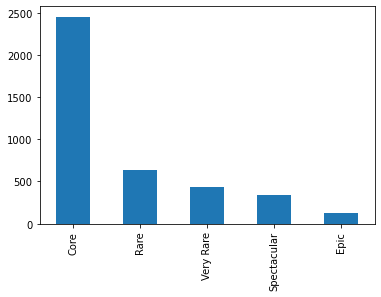

In [237]:
# bar Chart represent rarity distribution
nft_sales.rarity_attribute.value_counts().plot(kind = 'bar');

In [199]:
# Dates Range
nft_sales.date.min(), nft_sales.date.max()

('2021-05-13', '2022-03-22')

In [11]:
# checking price mean median max and min for rare NFTs
print (f'rare sales mean price = {nft_sales_rare.sale_price_eth.mean()}')
print (f'rare sales median price = {nft_sales_rare.sale_price_eth.median()}')
print (f'rare sales max price = {nft_sales_rare.sale_price_eth.max()}')
print (f'rare sales min price = {nft_sales_rare.sale_price_eth.min()}')

rare sales mean price = 10.469150725411046
rare sales median price = 9.95
rare sales max price = 55.0
rare sales min price = 0.0


In [12]:
# checking price mean median max and min for very rare NFTs
print (f'Very rare sales mean price = {nft_sales_very.sale_price_eth.mean()} ETH')
print (f'Very rare sales median price = {nft_sales_very.sale_price_eth.median()} ETH')
print (f'Very rare sales max price = {nft_sales_very.sale_price_eth.max()} ETH')
print (f'Very rare sales min price = {nft_sales_very.sale_price_eth.min()} ETH')

Very rare sales mean price = 11.033108818335338 ETH
Very rare sales median price = 10.495000000000001 ETH
Very rare sales max price = 48.5 ETH
Very rare sales min price = 0.0 ETH


In [13]:
# checking price mean median max and min for spectacular NFTs
print (f'Spectacular sales mean price = {nft_sales_Spectacular.sale_price_eth.mean()} ETH')
print (f'Spectacular sales median price = {nft_sales_Spectacular.sale_price_eth.median()} ETH')
print (f'Spectacular sales max price = {nft_sales_Spectacular.sale_price_eth.max()} ETH')
print (f'Spectacular sales min price = {nft_sales_Spectacular.sale_price_eth.min()} ETH')

Spectacular sales mean price = 22.359119257955573 ETH
Spectacular sales median price = 19.99 ETH
Spectacular sales max price = 130.0 ETH
Spectacular sales min price = 0.0 ETH


In [14]:
# checking price mean median max and min for epic NFTs
print (f'epic sales mean price = {nft_sales_epic.sale_price_eth.mean()} ETH')
print (f'epic sales median price = {nft_sales_epic.sale_price_eth.median()} ETH')
print (f'epic sales max price = {nft_sales_epic.sale_price_eth.max()} ETH')
print (f'epic sales min price = {nft_sales_epic.sale_price_eth.min()} ETH')

epic sales mean price = 15.66338701438492 ETH
epic sales median price = 15.1 ETH
epic sales max price = 50.0 ETH
epic sales min price = 0.0 ETH


In [239]:
#select core NFTs
nft_core = nft_sales[nft_sales['rarity_attribute']=='Core']

In [242]:
# checking price mean median max and min for core NFTs
print (f'Core sales mean price = {nft_core.sale_price_eth.mean()} ETH')
print (f'Core sales median price = {nft_core.sale_price_eth.median()} ETH')
print (f'Core sales max price = {nft_core.sale_price_eth.max()} ETH')
print (f'Core sales min price = {nft_core.sale_price_eth.min()} ETH')

Core sales mean price = 10.697474779087718 ETH
Core sales median price = 9.29 ETH
Core sales max price = 120.0 ETH
Core sales min price = 0.0 ETH


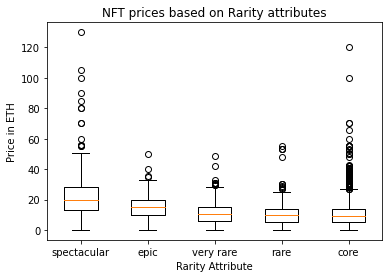

In [243]:
# box plot for the fout different rarity attributes
plt.boxplot([nft_sales_Spectacular.sale_price_eth,
             nft_sales_epic.sale_price_eth, 
             nft_sales_very.sale_price_eth,
             nft_sales_rare.sale_price_eth,
             nft_core.sale_price_eth],labels = ['spectacular', 'epic', 'very rare', 'rare','core'])
plt.title('NFT prices based on Rarity attributes')
plt.ylabel('Price in ETH')
plt.xlabel('Rarity Attribute');

### we notice more number of outliers in the spectacular and Core NFTs with the highest price at  130 ETH 

In [30]:
# check different NFT categories 
cat = nft_sales.category_attribute.value_counts().index.to_list()
cat 

['Mammal',
 'Bird',
 'Invertebrate',
 'Fish',
 'Creature',
 'Reptile',
 'Just Art',
 'Human',
 'Amphibian',
 'Dinosaur']

In [222]:
# colors to display on chart 
cat_color = ['navy', 'grey', 'maroon', 'green', 'darkorange', 'blue', 'brown', 'yellow', 'red', 'black']

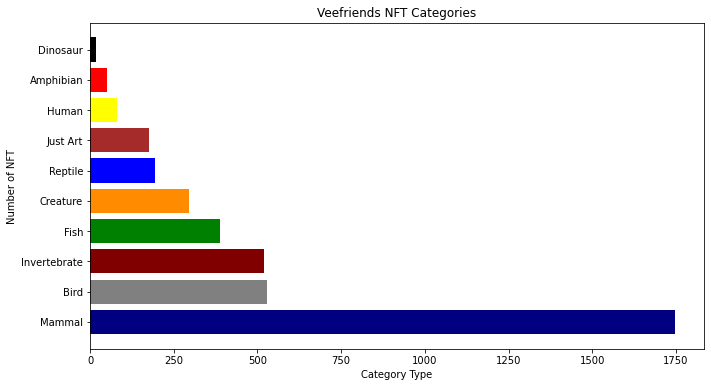

In [234]:
# horizontal bar chart for categories
fig, ax = plt.subplots(figsize = (11, 6))
ax = plt.barh(y = cat, width=nft_sales.category_attribute.value_counts().values, color = cat_color)
plt.title ('Veefriends NFT Categories')
plt.ylabel('Number of NFT')
plt.xlabel('Category Type');

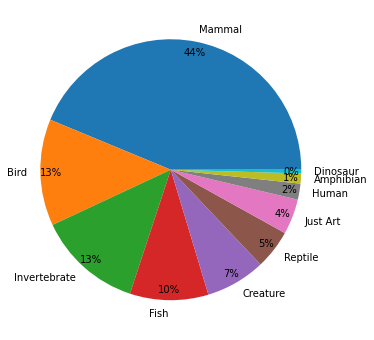

In [142]:
# pie chart for categories
plt.figure(figsize=(12,6))
plt.pie(nft_sales.category_attribute.value_counts().values, labels = cat, pctdistance=0.92,autopct='%.0f%%');

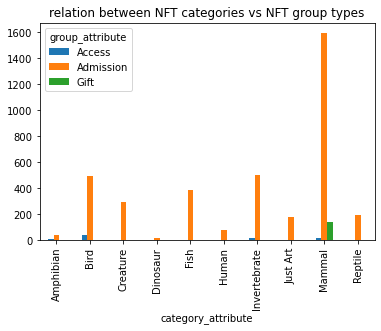

In [255]:
# bar chart show relation between NFT categories vs NFT group types
pd.crosstab(nft_sales['category_attribute'],nft_sales['group_attribute']).plot(kind = 'bar')
plt.title ('relation between NFT categories vs NFT group types');

In [46]:
# total_sales eth
total_sales = nft_sales.sale_price_eth.sum()
total_sales

47306.9323554686

In [48]:
# total sales USD
total_sales_usd = nft_sales.sale_price_usd.sum()
total_sales_usd

147577636.98371938

In [53]:
# highest sales
highest_sale = nft_sales[nft_sales.sale_price_eth == nft_sales.sale_price_eth.max()]
highest_sale  

,Unnamed: 0,date,asset_id,from_address,to_address,transaction_hash,type,sale_price_eth,sale_price_usd,name,rarity_attribute,Editions_attribute,overall_rarity_score,category_attribute,benefit_attribute,group_attribute,adjective_attribute,animal_attribute,url
13179,13179,2022-01-04,2823,0x3cd3bf7db26df10ff229fe8f8650bb9f8d05f103,0x6676751a1c3592f589e32f28e649febe7ef2b805,0xa33136985d9462ab3ec1e9e4a385eab7e1887eb58992...,sales,130.0,490022.0,Empathy Elephant,Spectacular,1 of 1,628.688812,Mammal,NaN,Admission,Empathy,Elephant,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...


In [63]:
#  Image url
high_url = highest_sale['url'].values[0]

# download player url image
imgURL = high_url
#img = urllib.request.urlretrieve(imgURL, r'C:\Users\LENOVO\env\nft_hack\img.png')
#img
imgURL

'www.opensea.io/assets/0xa3aee8bce55beea1951ef834b99f3ac60d1abeeb/2823'

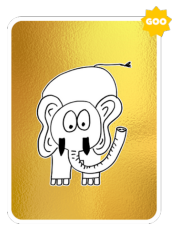

In [70]:
# show image for highest NFT sale price
mm1 = mpimg.imread("img1.png")
plt.imshow(mm1)
plt.axis('off');

In [56]:
# lowest sales
# remove sales with zero values

no_zero_sales = nft_sales[nft_sales.sale_price_eth != 0]
no_zero_sales

lowest_sale = no_zero_sales[no_zero_sales.sale_price_eth == no_zero_sales.sale_price_eth.min()]
lowest_sale

,Unnamed: 0,date,asset_id,from_address,to_address,transaction_hash,type,sale_price_eth,sale_price_usd,name,rarity_attribute,Editions_attribute,overall_rarity_score,category_attribute,benefit_attribute,group_attribute,adjective_attribute,animal_attribute,url
23,23,2021-05-13,6673,0xe2aeddecfbf164e362e9007ffbf28f45e87953ce,0x042aec8963402bb6fea9814e7b44b646f1366039,0x5809be687e63af2b0e9a4cfe9a16dfc37b91130e5a00...,sales,2.492000e-11,9.734026e-08,Noble Numbat,Spectacular,1 of 1,31360.023102,Mammal,NaN,Admission,Noble,Numbat,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...


In [235]:
# lowest sales url
no_zero_sales.url.values[0]

'www.opensea.io/assets/0xa3aee8bce55beea1951ef834b99f3ac60d1abeeb/7130'

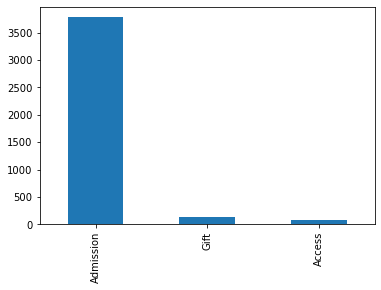

In [262]:
#bar chart showing NFT groups 
nft_sales.group_attribute.value_counts().plot.bar();

In [272]:
# gift total sales ? admission total sales ?  access total sales ? (Max & min)

gift_sales = nft_sales[nft_sales.group_attribute == 'Gift']
access_sales = nft_sales[nft_sales.group_attribute == 'Access']
admission_sales = nft_sales[nft_sales.group_attribute == 'Admission']
gift_sales.sale_price_eth.mean(), access_sales.sale_price_eth.mean(), admission_sales.sale_price_eth.mean()

(26.63460496180826, 21.648211558231317, 11.117574579220825)

In [273]:
# gift higest price

gift_higest = gift_sales[gift_sales.sale_price_eth == gift_sales.sale_price_eth.max()]
gift_higest

,Unnamed: 0,date,asset_id,from_address,to_address,transaction_hash,type,sale_price_eth,sale_price_usd,name,rarity_attribute,Editions_attribute,overall_rarity_score,category_attribute,benefit_attribute,group_attribute,adjective_attribute,animal_attribute,url
16086,16086,2022-03-16,3771,0xa2c8d741c21dfca2e211d852d930384a49e88756,0x2b8d6dd1058b6eb32206e3c031284a9e756d9edf,0xcd873f63b3e04943bf88de81d89bd9b51f9e85533888...,sales,65.55,171764.850526,Gift Goat,NaN,1 of 555,25772.01435,Mammal,NaN,Gift,Gift,Goat,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...


In [274]:
# prepare to plot relation between NFT groups and average price change
gift = gift_sales.groupby("date").sale_price_eth.mean()
access = access_sales.groupby("date").sale_price_eth.mean()
admission = admission_sales.groupby("date").sale_price_eth.mean()


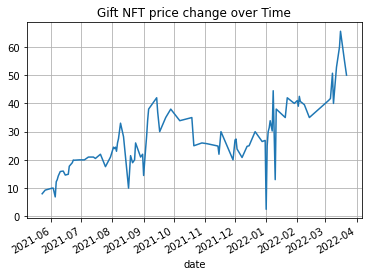

In [275]:
# plot average price change over time for each NFT group type
#gift
fig, ax = plt.subplots()
gift.plot(grid= True)

plt.title('Gift NFT price change over Time');


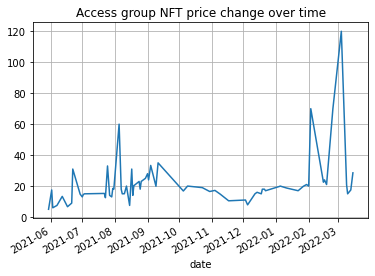

In [276]:
#Access NFT price change over time
access.plot(grid = True)
plt.gcf().autofmt_xdate();
plt.title('Access group NFT price change over time');

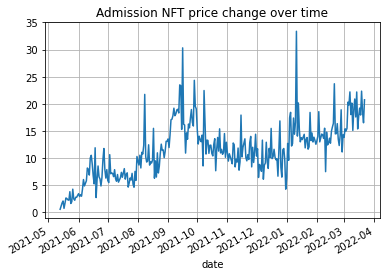

In [277]:
# Admission NFT price change over time
admission.plot(grid = True)
plt.gcf().autofmt_xdate()
plt.title ('Admission NFT price change over time');

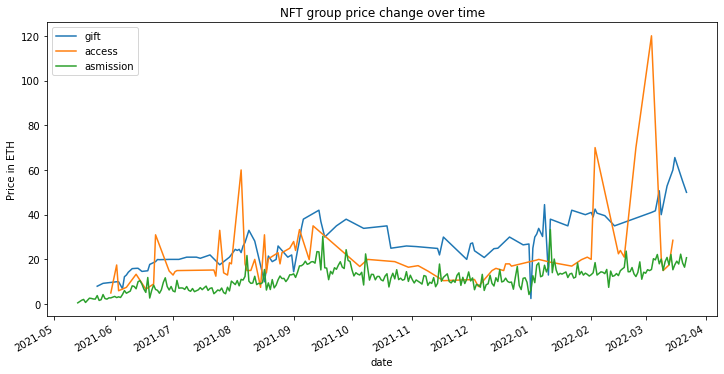

In [278]:
# price change over time for the three NFT group types
plt.figure(figsize = (12,6))
gift.plot()
access.plot()
admission.plot()
plt.title('NFT group price change over time')
plt.legend(['gift','access','asmission'])
plt.ylabel('Price in ETH');


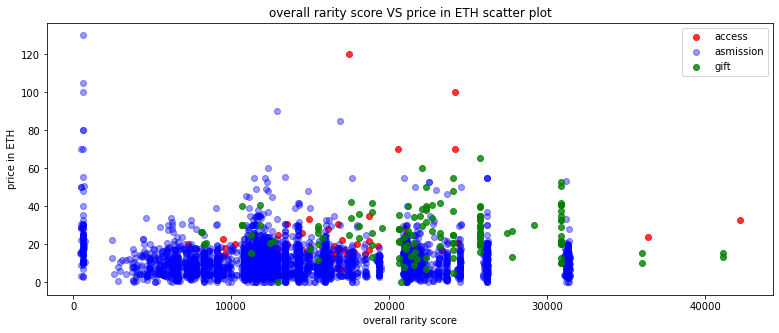

In [279]:
#scatter plot for NFT rarity price relation
plt.figure(figsize=(13,5))
plt.scatter(nft_sales.overall_rarity_score[nft_sales['group_attribute'] == 'Access'], 
            nft_sales.sale_price_eth[nft_sales['group_attribute'] == 'Access'],
            color= 'red',
            alpha = 0.8)
plt.scatter(nft_sales.overall_rarity_score[nft_sales['group_attribute'] == 'Admission'], 
            nft_sales.sale_price_eth[nft_sales['group_attribute'] == 'Admission'],
            color= 'blue',
            alpha=0.4)
plt.scatter(nft_sales.overall_rarity_score[nft_sales['group_attribute'] == 'Gift'], 
            nft_sales.sale_price_eth[nft_sales['group_attribute'] == 'Gift'],
            color= 'green',
            alpha=0.8)
plt.title('overall rarity score VS price in ETH scatter plot')
plt.legend(['access','asmission','gift'])
plt.xlabel('overall rarity score')
plt.ylabel('price in ETH');